In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfLoad =pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/ClassificationSample2.txt", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jeong\AppData\Local\Temp\ipykernel_13068\1902993597.py:1: SyntaxWarning: invalid escape sequence '\s'
  dfLoad =pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/ClassificationSample2.txt", sep="\s+")


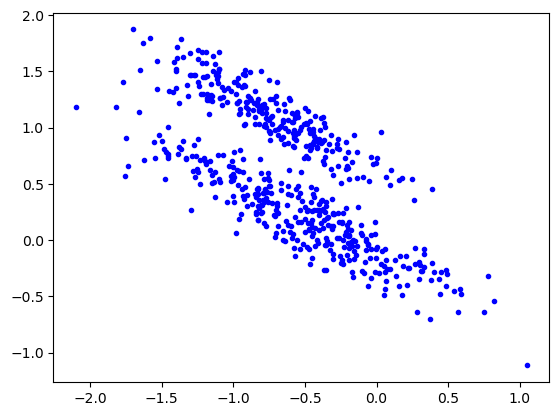

In [3]:
samples = np.array(dfLoad)
x = samples[:, 0]
y = samples[:, 1]

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')

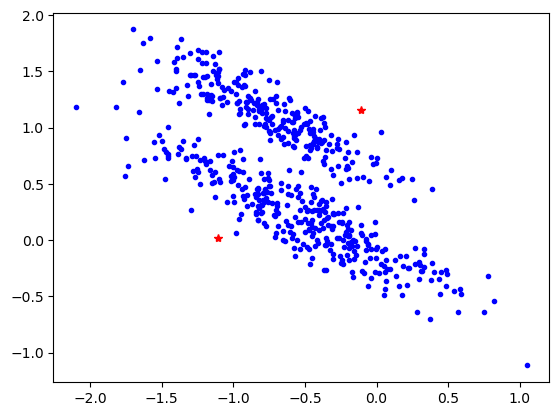

In [4]:
[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]
z0 = np.array([mx+sx, my+sy]).reshape(1, 2)
z1 = np.array([mx-sx, my-sy]).reshape(1, 2)
Z = np.r_[z0, z1]

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')
ax1.plot(Z[:, 0], Z[:,1], 'r*')

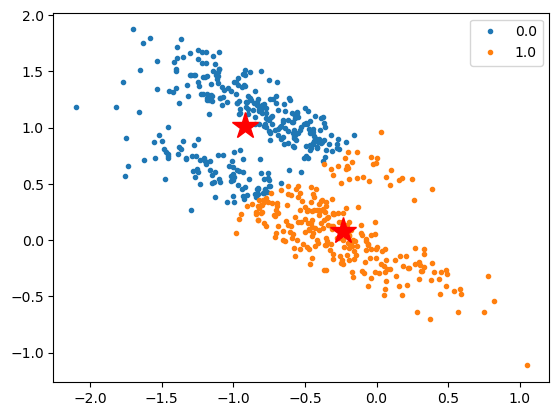

In [6]:
N = len(samples)
k = np.zeros(N)
numK = 2

while(True):
    kOld = np.copy(k)
    for i in np.arange(N):
        z0D = np.linalg.norm(samples[i,:]-Z[0,:])
        z1D = np.linalg.norm(samples[i,:]-Z[1,:])
        k[i] = z0D > z1D
    if (np.alltrue(kOld == k)):
            break
    dfCluster = pd.DataFrame(np.c_[x, y, k])
    dfCluster.columns = ['x', 'y', 'k']
    dfGroup = dfCluster.groupby('k')

    for cluster in range(numK):
        Z[cluster, :] = dfGroup.mean().iloc[cluster]

f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
for (cluster, dataInCluster) in dfGroup:
    ax2.plot(dataInCluster.x, dataInCluster.y, '.', label=cluster)
ax2.plot(Z[:,0], Z[:,1], 'r*', markersize=20)
ax2.legend()

**단순히 거리만을 이용하기 때문에 알맞게 분류를 하지 못하는 것을 볼 수 있다.**  
**통계적 개념을 이용한 GMM을 이용해 clustering을 하면 이러한 문제를 해결 할 수 있다.**